In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import datetime
import xlrd
import warnings
warnings.simplefilter('ignore')

## Data Processing

In [21]:
# relevant data frames
df1=pd.read_csv('cabdataset/Cab_Data.csv')
df2=pd.read_csv('cabdataset/City.csv')
df3=pd.read_csv('cabdataset/Customer_ID.csv')
df4=pd.read_csv('cabdataset/Transaction_ID.csv')

In [148]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Profit,Quarter,Month,Year,Day,Day of Week,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,57.315,1,1,2016,8,4,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,23.666,1,1,2016,6,2,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,27.568,1,1,2016,2,5,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,25.798,1,1,2016,7,3,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,16.844,1,1,2016,3,6,1.929439


In [153]:
df1.describe() # quantile + descriptive stats 

,Transaction ID,KM Travelled,Profit,Quarter,Month,Year,Day,Day of Week,Profit per KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,137.253198,2.817628,7.500434,2017.045199,15.628447,3.750620,6.083579
std,1.268058e+05,12.233526,160.311840,1.107687,3.445095,0.800239,8.827151,1.858849,5.543493
min,1.000001e+07,1.900000,-220.060000,1.000000,1.000000,2016.000000,1.000000,0.000000,-4.998235
25%,1.011081e+07,12.000000,28.012000,2.000000,5.000000,2016.000000,8.000000,3.000000,2.000385
50%,1.022104e+07,22.440000,81.962000,3.000000,8.000000,2017.000000,16.000000,4.000000,4.466809
75%,1.033094e+07,32.960000,190.030000,4.000000,10.000000,2018.000000,23.000000,5.000000,9.170006
max,1.044011e+07,48.000000,1463.966000,4.000000,12.000000,2018.000000,31.000000,6.000000,41.115556


In [152]:
# categorical data
df1.City.value_counts() # NY is the mode
df1.Company.value_counts()
df1.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Profit            301825
Quarter                4
Month                 12
Year                   3
Day                   31
Day of Week            7
Profit per KM     356065
dtype: int64

In [149]:
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [150]:
df3.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [151]:
df4.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [22]:
# convert date into date-time format
def exceltodatetime(date):
    datetime_date=xlrd.xldate_as_datetime(date,0)
    date_object=datetime_date.date()
#     string_date=date_object.isoformat()
#     return string_date
    return date_object


df1['Profit']=df1['Price Charged']-df1['Cost of Trip']
df1.drop(labels=['Price Charged', 'Cost of Trip'],axis=1, inplace=True)
df1['Date of Travel']=df1['Date of Travel'].apply(lambda x: exceltodatetime(x))
df1['Date of Travel']=pd.to_datetime(df1['Date of Travel'], errors='coerce')
df1['Quarter']=df1['Date of Travel'].dt.quarter
df1['Month']=df1['Date of Travel'].dt.month
df1['Year']=df1['Date of Travel'].dt.year
df1['Day']=df1['Date of Travel'].dt.day
df1['Day of Week']=df1['Date of Travel'].dt.dayofweek

In [31]:
# check for NaN values in pandas dataframe
df1.isnull().values.any() # False
df2.isnull().values.any() # False
df3.isnull().values.any() # False
df4.isnull().values.any() # False

False

In [38]:
# check for duplicate rows
df1.duplicated().any() # False
df1.duplicated().any() # False
df1.duplicated().any() # False
df1.duplicated().any() # False

False

## Profit Analysis

In [226]:
len(ytick_labels)

12

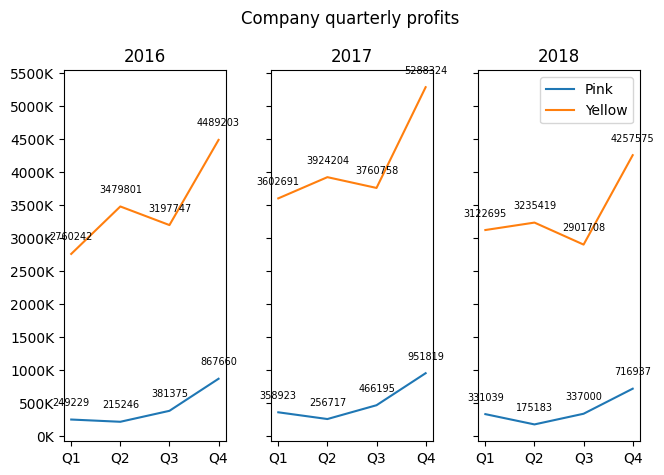

In [231]:
# compare quarterly profit seasonality
quarterlyprofits=df1.groupby(['Company','Year', 'Quarter']).Profit.sum()
quarterlyprofits.index
years=['2016','2017','2018']
quarters=['Q1','Q2','Q3','Q4']
ytick_labels=[f'{i}K' for i in range(0,6000, 500)]

counter=0

fig, ax = plt.subplots(1,3, sharey=True)
for year in years:
    # pink cab quarterly profits
    pinkquarterlyprofits_year=quarterlyprofits.filter(like='Pink Cab').filter(like=year)

    # yellow cab quarterly profits
    yellowquarterlyprofits_year=quarterlyprofits.filter(like='Yellow Cab').filter(like=year)
    
    ax[counter].plot(quarters, pinkquarterlyprofits_year)
    ax[counter].plot(quarters, yellowquarterlyprofits_year)
    ax[counter].set_title(year)

    for x, y in zip(quarters, pinkquarterlyprofits_year):
        label=int(y)
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center", size=7)
        
    for x, y in zip(quarters, yellowquarterlyprofits_year):
        label=int(y) 
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center", size=7)
        
    counter+=1
    
    
fig.suptitle('Company quarterly profits')
# ax[0].set_ylabel('Profits ($)')
# ax[0].set_yticklabels(yticks, labels=[f"{i} K" for i in yticks])

# form legend
line1 = mlines.Line2D([], [], color='#1f77b4', ls='-', label='Pink')
line2 = mlines.Line2D([], [], color='#ff7f0e', ls='-', label='Yellow')

plt.legend(handles=[line1, line2], fancybox=True)
fig.tight_layout()
ax[0].set_yticks(np.linspace(0,5.5e6,12), ytick_labels )
plt.show()

Yellow cab consistently achieved higher profits at each quarter across the two year span

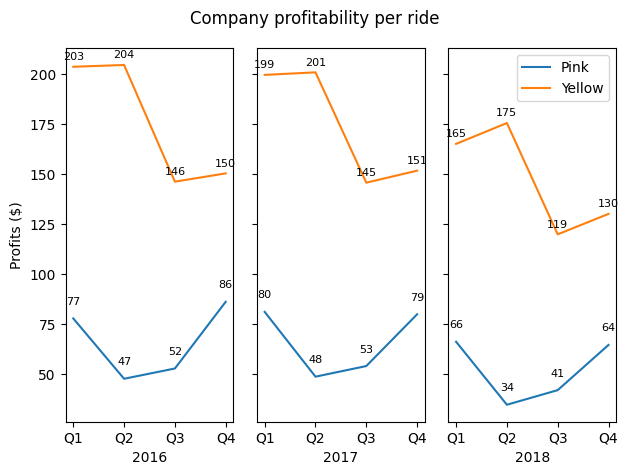

In [235]:
# compare seasonality in no. of rides
# each transaction is a single ride
quarterlyrides=df1.groupby(['Company','Year', 'Quarter'])['Transaction ID'].count()
counter=0
fig, ax = plt.subplots(1,3, sharey=True)

for year in years:
    # pink cab profits per ride
    pinkquarterlyrides_year=quarterlyrides.filter(like='Pink Cab').filter(like=year)
    pinkquarterlyprofits_year=quarterlyprofits.filter(like='Pink Cab').filter(like=year)
    pinkprofitsperride_year=pinkquarterlyprofits_year/pinkquarterlyrides_year

    # yellow cab profits per ride
    yellowquarterlyrides_year=quarterlyrides.filter(like='Yellow Cab').filter(like=year)
    yellowquarterlyprofits_year=quarterlyprofits.filter(like='Yellow Cab').filter(like=year)
    yellowprofitsperride_year=yellowquarterlyprofits_year/yellowquarterlyrides_year

    ax[counter].plot(['Q1','Q2','Q3','Q4'], pinkprofitsperride_year, label='Pink Cab')
    ax[counter].plot(['Q1','Q2','Q3','Q4'], yellowprofitsperride_year, label='Yellow Cab')
    ax[counter].set_xlabel(year)
    
    
    for x, y in zip(quarters, pinkprofitsperride_year):
        label=int(y)
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center", size=8)
        
    for x, y in zip(quarters, yellowprofitsperride_year):
        label=int(y) 
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 5), ha="center", size=8)

    counter+=1
    
# form legend
line1 = mlines.Line2D([], [], color='#1f77b4', ls='-', label='Pink')
line2 = mlines.Line2D([], [], color='#ff7f0e', ls='-', label='Yellow')

plt.legend(handles=[line1, line2], fancybox=True)
fig.suptitle('Company profitability per ride')
ax[0].set_ylabel('Profits ($)')
plt.tight_layout()
plt.show()

Profitability per ride was looked at to uncover if investing in the Pink Cab would be better after scaling the company to service more rides/customers (assuming operations were to remain as efficient). However the Yellow Cab consistently has a much higher profit per ride, also.

### Average profitability per KM

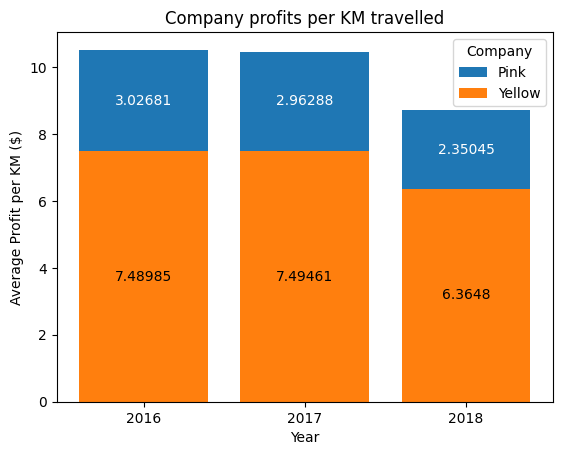

In [204]:
# profit per km
df1['Profit per KM']=df1['Profit']/df1['KM Travelled']
average_profit_per_km=df1.groupby(['Company','Year'])['Profit per KM'].mean()

years=['2016','2017','2018']
average_profit_per_km_pink=average_profit_per_km[0:3]
average_profit_per_km_yellow=average_profit_per_km[3:6]

pink=plt.bar(['2016','2017','2018'], average_profit_per_km_pink, bottom=average_profit_per_km_yellow, label='Pink')
yellow=plt.bar(['2016','2017','2018'], average_profit_per_km_yellow, label='Yellow')
plt.bar_label(pink, label_type='center', color='w')
plt.bar_label(yellow, label_type='center')

plt.ylabel('Average Profit per KM ($)')
plt.xlabel('Year')
plt.title('Company profits per KM travelled')
plt.legend(title='Company')
plt.show()

In [237]:
x=(7.49-3.02)/3.02 + (7.49-2.96)/2.96 + (6.36-2.35)/2.35
x=x/3
x*100

157.23069448199786

Yellow excels according to this metric also, averaging 157% higher profitability per KM more over the three year span

## Customer Base Profit Analysis

In [107]:
ch=pd.merge(df3, df4, on=['Customer ID'])
customers=pd.merge(df1, ch, on=['Transaction ID'])

In [108]:
customers=customers.loc[:, ['Company', 'Gender', 'Age', 'Income (USD/Month)', 'Year', 'Profit']]

### Profitability by gender

In [109]:
# genderwise contribution in profit
profits_by_gender=customers.groupby(['Company', 'Gender', 'Year'])['Profit'].sum()

pink_profits_by_gender=profits_by_gender.filter(like='Pink Cab')
yellow_profits_by_gender=profits_by_gender.filter(like='Yellow Cab')

# company profits by gender
pink_female_profits=pink_profits_by_gender[0:3]
pink_male_profits=pink_profits_by_gender[3:6]
yellow_female_profits=yellow_profits_by_gender[0:3]
yellow_male_profits=yellow_profits_by_gender[3:6]

# convert to percentages
total=np.array(pink_female_profits)+np.array(pink_male_profits)
pink_female_percentage=pink_female_profits/total*100
pink_male_percentage=pink_male_profits/total*100

total=np.array(yellow_female_profits)+np.array(yellow_male_profits)
yellow_female_percentage=yellow_female_profits/total*100
yellow_male_percentage=yellow_male_profits/total*100

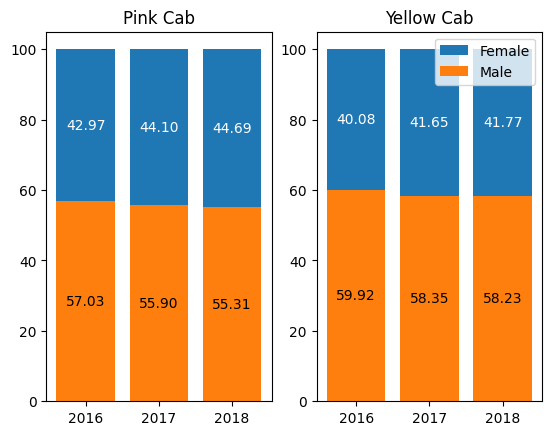

In [122]:
years=['2016','2017','2018']

fig, ax = plt.subplots(1,2)

# pink female profits
pink_female=ax[0].bar(years, pink_female_percentage, bottom=pink_male_percentage, label='Female')
pink_male=ax[0].bar(years, pink_male_percentage, label='Male')

ax[0].bar_label(pink_female,label_type='center', color='w', fmt='%.2f')
ax[0].bar_label(pink_male,label_type='center', fmt='%.2f')
ax[0].set_title('Pink Cab')

# yellow female profits
yellow_female=ax[1].bar(years, yellow_female_percentage, bottom=yellow_male_percentage, label='Female')
yellow_male=ax[1].bar(years, yellow_male_percentage, label='Male')

ax[1].bar_label(yellow_female,label_type='center', color='w', fmt='%.2f')
ax[1].bar_label(yellow_male,label_type='center', fmt='%.2f')
ax[1].set_title('Yellow Cab')


plt.legend()
plt.show()

They perform similarly in this regard with almost identical distributions of profit across the gender customer base for both cab companies.

### Profitability by age group

In [123]:
teens=customers.query('18<= Age <= 25')
young_adults=customers.query('26<= Age <=40')
mid_adults=customers.query('41<= Age <=60')
grown_adults=customers.query('Age > 60')

In [124]:
# total profit by agegroup
teen_profits=teens.groupby(['Year', 'Company'])['Profit'].sum()
young_adults_profits=young_adults.groupby(['Year', 'Company'])['Profit'].sum()
mid_adults_profits=mid_adults.groupby(['Year', 'Company'])['Profit'].sum()
grown_adults_profits=grown_adults.groupby(['Year', 'Company'])['Profit'].sum()

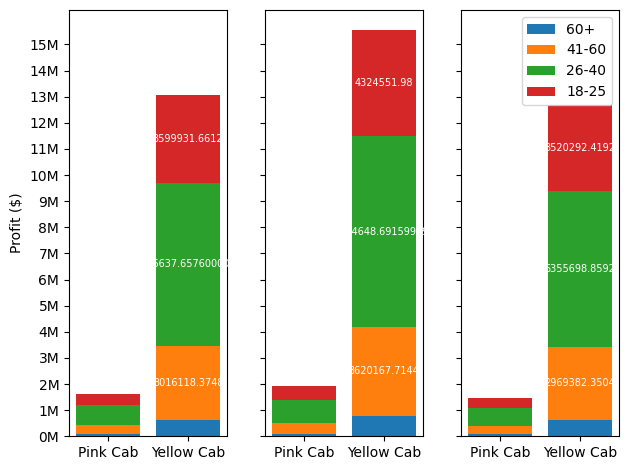

In [243]:
fig, ax = plt.subplots(1,3, sharey=True)
labels=['Pink Cab', 'Yellow Cab']
years=['2016','2017','2018']
counter=0
ytick_labels=[f'{i}M' for i in range(16)]

for year in years:
    grown_profits_year=grown_adults_profits.filter(like=year)
    mid_profits_year=mid_adults_profits.filter(like=year)
    young_profits_year=young_adults_profits.filter(like=year)
    teen_profits_year=teen_profits.filter(like=year)

    grown_adults_year=ax[counter].bar(labels, grown_profits_year, label='60+')
    mid_adults_year=ax[counter].bar(labels, mid_profits_year, bottom=grown_profits_year, label='41-60')
    young_adults_year=ax[counter].bar(labels, young_profits_year, bottom=grown_profits_year+mid_profits_year, label='26-40')
    teens_year=ax[counter].bar(labels, teen_profits_year, bottom=grown_profits_year+mid_profits_year+young_profits_year, label='18-25')

#     ax[counter].bar_label(teens_year,label_type='center', fmt=f'%.2f')
#     ax[counter].bar_label(young_adults_year,label_type='center', fmt=f'%.2f')
#     ax[counter].bar_label(mid_adults_year,label_type='center', fmt=f'%.2f')
#     ax[counter].bar_label(grown_adults_year,label_type='center', fmt=f'%.2f')
    
    
    counter+=1

# ignore labels for small values
for i in range(3):
    for c in ax[i].containers:
        labels = [v.get_height() if v.get_height() > 1e6 else '' for v in c]
        ax[i].bar_label(c, labels=labels, label_type='center', fmt='%.2f', size=7, color='w')
    
ax[0].set_yticks(np.linspace(0,16e6,16), ytick_labels)
ax[0].set_ylabel('Profit ($)')
plt.plot()
plt.tight_layout()
plt.legend()
plt.show()

Yellow cab performs slightly better here serving more elderly people (60+ category) but they offer comparable proportions to other age groups.

### Profitability by Income Class

In [187]:
lower_class=customers.query('`Income (USD/Month)` < 2500')
middle_class=customers.query('2500 <= `Income (USD/Month)` <=15000')
upper_class=customers.query('15000< `Income (USD/Month)`')

In [188]:
lower_class_profits=lower_class.groupby(['Year', 'Company'])['Profit'].sum()
middle_class_profits=middle_class.groupby(['Year', 'Company'])['Profit'].sum()
upper_class_profits=upper_class.groupby(['Year', 'Company'])['Profit'].sum()

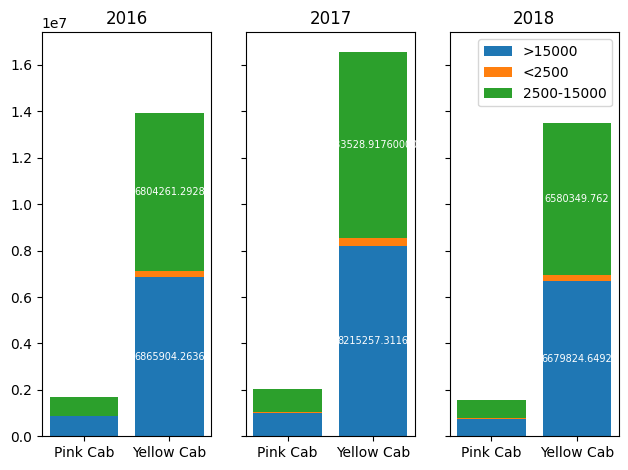

In [203]:
fig, ax = plt.subplots(1,3, sharey=True)
labels=['Pink Cab', 'Yellow Cab']
years=['2016','2017','2018']
counter=0
for year in years:
    lower_class_profits_year=lower_class_profits.filter(like=year)
    middle_class_profits_year=middle_class_profits.filter(like=year)
    upper_class_profits_year=upper_class_profits.filter(like=year)
    
    upper_class_year=ax[counter].bar(labels, upper_class_profits_year, label='>15000')
    low_class_year=ax[counter].bar(labels, lower_class_profits_year, bottom=upper_class_profits_year, label='<2500')
    middle_class_year=ax[counter].bar(labels, middle_class_profits_year, bottom=upper_class_profits_year+lower_class_profits_year, label='2500-15000')
    
    ax[counter].set_title(year)
    counter+=1

for i in range(3):
    for c in ax[i].containers:
        labels = [v.get_height() if v.get_height() > 1e6 else '' for v in c]
        ax[i].bar_label(c, labels=labels, label_type='center', fmt='%.2f', size=7, color='w')
        
fig.tight_layout()
plt.plot()
plt.legend()
plt.show()

### Profitability by gender

## Profit/ride forecasting section using ML models (research about timeseries forecasting in python)

In [198]:
from prophet import Prophet

In [17]:
df1.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Profit', 'Quarter', 'Month', 'Year', 'Day', 'Day of Week',
       'Profit per KM'],
      dtype='object')

In [199]:
array_segments=np.array_split(pink_profit_data, 5)

NameError: name 'pink_profit_data' is not defined

In [42]:
array_segments[0].mean()[0]

56.687606150032465

In [ ]:
plt.plot(pink_profit_data['y'])
xmin=0
xmax=1/5
for segment in array_segments:
    plt.axhline(segment.mean()[0], color='r', xmin=xmin, xmax=xmax)
    xmin+=1/5
    xmax+=1/5

In [200]:
plt.hist(pink_profit_data['y'], bins=100)
plt.show()
# looks like a gaussian distribution, perhaps white noise?

NameError: name 'pink_profit_data' is not defined

In [201]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pink_profit_data['y'])
plt.show()

NameError: name 'pink_profit_data' is not defined

In [23]:
profit_data=df1.loc[:, ['Date of Travel', 'Company', 'Profit']]

# pink profit data
pink_forecast=Prophet(interval_width=0.95)
pink_profit_data=profit_data[profit_data['Company']=='Pink Cab']

pink_profit_data.drop(['Company'], axis=1, inplace=True)
# expected column names for prophet
pink_profit_data.rename(columns={'Date of Travel': 'ds', 'Profit': 'y'}, inplace=True)

pink_forecast.fit(pink_profit_data)
pink_future=pink_forecast.make_future_dataframe(periods=365, freq='D')
pink_future_profits=pink_forecast.predict(pink_future)

# # yellow profit data
# yellow_profit_data=profit_data[profit_data['Company']=='Yellow Cab']

# # yellow_profit_data['Company'].unique()

11:59:42 - cmdstanpy - INFO - Chain [1] start processing
12:00:02 - cmdstanpy - INFO - Chain [1] done processing


__note on forecasting__:

constant mean is indicative of white noise although autocorrelation plots suggest there is autocorrelation between deparate time segements (at least earlier on)
my article will be on time series forecasting where I can study this in greater depth and continue the plot. As for now, forecasting provided by above prophet model is highly inaccurate

## Cash vs card payment for each company

In [167]:
# compare payment methods between companies
paymenttype=pd.merge(df1, df4, on=['Transaction ID']) # inner join
payments=paymenttype.groupby(['Company','Year','Payment_Mode']).Payment_Mode.count() # no. of cash/card payments

In [168]:
# payments

In [169]:
# cash vs card transactions for each company
#2016
pink_payments_2016=payments.filter(like='Pink Cab').filter(like='2016')
yellow_payments_2016=payments.filter(like='Yellow Cab').filter(like='2016')
card_2016=pd.Series([pink_payments_2016[0], yellow_payments_2016[0]])
cash_2016=pd.Series([pink_payments_2016[1], yellow_payments_2016[1]])

#2017
pink_payments_2017=payments.filter(like='Pink Cab').filter(like='2017')
yellow_payments_2017=payments.filter(like='Yellow Cab').filter(like='2017')
card_2017=[pink_payments_2017[0], yellow_payments_2017[0]]
cash_2017=[pink_payments_2017[1], yellow_payments_2017[1]]

#2018
pink_payments_2018=payments.filter(like='Pink Cab').filter(like='2018')
yellow_payments_2018=payments.filter(like='Yellow Cab').filter(like='2018')
card_2018=[pink_payments_2018[0], yellow_payments_2018[0]]
cash_2018=[pink_payments_2018[1], yellow_payments_2018[1]]

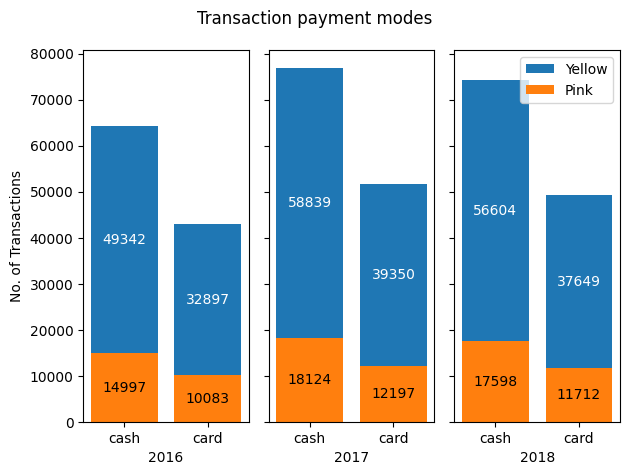

In [170]:
# might be better to swap pink 
labels=['cash', 'card']

fig, ax = plt.subplots(1,3, sharey=True)

#figures
cash_2016=ax[0].bar(labels, yellow_payments_2016,  bottom=pink_payments_2016, label='Yellow')
card_2016=ax[0].bar(labels, pink_payments_2016,label='Pink')

cash_2017=ax[1].bar(labels, yellow_payments_2017, bottom=pink_payments_2017, label='Yellow')
card_2017=ax[1].bar(labels, pink_payments_2017, label='Pink')

cash_2018=ax[2].bar(labels, yellow_payments_2018, bottom=pink_payments_2018, label='Yellow')
card_2018=ax[2].bar(labels, pink_payments_2018, label='Pink')

#labels
ax[0].bar_label(cash_2016,label_type='center', color='w')
ax[0].bar_label(card_2016,label_type='center')
ax[0].set_xlabel('2016')

ax[1].bar_label(cash_2017,label_type='center', color='w')
ax[1].bar_label(card_2017,label_type='center')
ax[1].set_xlabel('2017')

ax[2].bar_label(cash_2018,label_type='center', color='w')
ax[2].bar_label(card_2018,label_type='center')
ax[2].set_xlabel('2018')
ax[0].set_ylabel('No. of Transactions')

fig.suptitle('Transaction payment modes')
fig.tight_layout()
plt.legend()
plt.show()

higher number of card payments supported, catering towards a digital movement by the yellow cab company (already has the infrastructure in place to support large volumes of digital infrastructure)

## Customer retention

Retention rates are a good way to determine how positive a users interaction with the service is. Higher retention rates suggest good customer service. We define retention as at least 5 repeat purchases over the 2 year period.

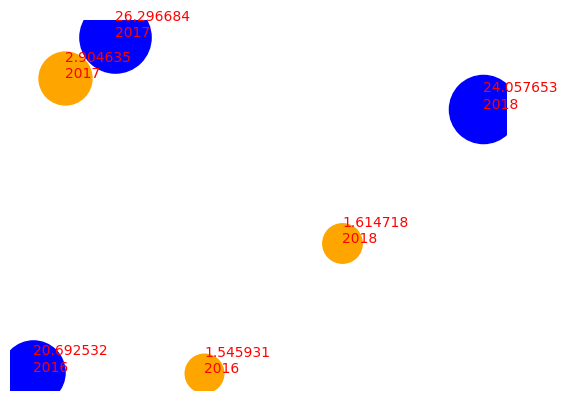

In [158]:
rides_per_customer=df1.join(df4, lsuffix='L', rsuffix='R').groupby(['Customer ID', 'Company', 'Year'])['Transaction IDL'].count() # number of transactions for each user

# implement for loop across each year
years=['2016','2017','2018']

for year in years:
    # pink retention for years
    rides_per_customer_pink=rides_per_customer.filter(like='Pink Cab').filter(like=year)
    at_least_5=rides_per_customer_pink[rides_per_customer_pink>=5]
    # how many customers rode more than 4 times/ number of customers in that year for the pink company
    pink_retention=len(at_least_5)/len(rides_per_customer_pink)*100

    # yellow retention for year
    rides_per_customer_yellow=rides_per_customer.filter(like='Yellow Cab').filter(like=year)
    at_least_5=rides_per_customer_yellow[rides_per_customer_yellow>=5]
    yellow_retention=len(at_least_5)/len(rides_per_customer_yellow)*100

    # need to arrange them nicely
    # need to label them neately and make an appropriate conclusion
    x_pink=np.random.uniform()
    y_pink=np.random.uniform()
    x_yellow=np.random.uniform()
    y_yellow=np.random.uniform()


    plt.scatter(x_pink,y_pink,s=pink_retention*500, color='orange', label=year)
    plt.scatter(x_yellow,y_yellow,s=yellow_retention*100, color='blue', label=year)
    plt.annotate(f'{yellow_retention:2f}\n{year}', (x_yellow,y_yellow), color='r')
    plt.annotate(f'{pink_retention:2f}\n{year}', (x_pink,y_pink), color='r')
# plt.legend(title='Company', labels=['Pink', 'Orange'])
plt.axis('off')
plt.show()

Clearly the yellow cab has a far better retention than the pink cab since a greater proportion of customers buy more than 5 times with them.

## is there any switching between services?

### Questions for the data:
2.2.1 and 2.2.2 good for testing statistical significance
- Is there seasonality in the number of customers using the cab service? seasonality in the profits?
- What were the proportion of card/cash payments for each company? Moving towards a digital age so card should be preffered
- what is the distribution of customers? what is the trend for each of these groups (e.g. does it look like an increasing number of a group are using cabs? Does any particular company underserve this group?)
- Do different customer groups(e.g. age, gender, income class) bring in different revenues/profits? 
- Does either company specialise in longer distance travel? (what were the trends in commuting distances pointing to at that time? e.g. more rides per year might not lead to higher profits if the ride journeys are shorter on average)
- which has the largest customer reach (based on number of customers)?
- how many repeat purchases does each cab company experience?
- profit and no. of rides forecasting? (e.g. using ML to get predictions for the next few years)
- is there any indication customers are leaving?

https://medium.com/@gauravtopre9/questions-to-ask-while-eda-1a19f82fbc5d

### Other datasets?
- check if there are any differences in card/cash payment proportions. If so, try to find a dataset showing different trends based on this